In [2]:
!pip install -q keras-ocr

     |████████████████████████████████| 42 kB 950 kB/s 
     |████████████████████████████████| 9.5 MB 34.8 MB/s 
     |████████████████████████████████| 619 kB 66.0 MB/s 
     |████████████████████████████████| 965 kB 42.5 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 


In [3]:
import keras_ocr
import matplotlib.pyplot as plt
import numpy as np 
import math
import cv2

In [4]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [5]:
images = [
    keras_ocr.tools.read(img) for img in ["/content/drive/MyDrive/sample/all barcode/IMG_20220303_173611.jpg" , '/content/drive/MyDrive/sample/all barcode/IMG_20220303_173846.jpg']
]

In [6]:
len(images)

2

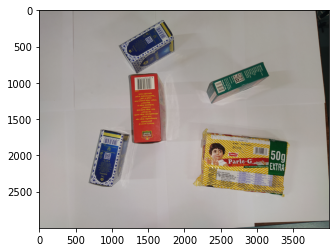

In [7]:
#plt.figure(figsize = (10,20))
plt.imshow(images[0])

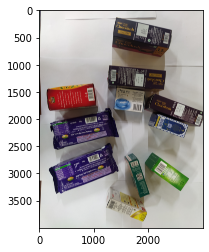

In [8]:
#plt.figure(figsize = (10,20))
plt.imshow(images[1])

In [9]:
prediction_groups = pipeline.recognize(images)

14/14 [==============================] - 107s 7s/step


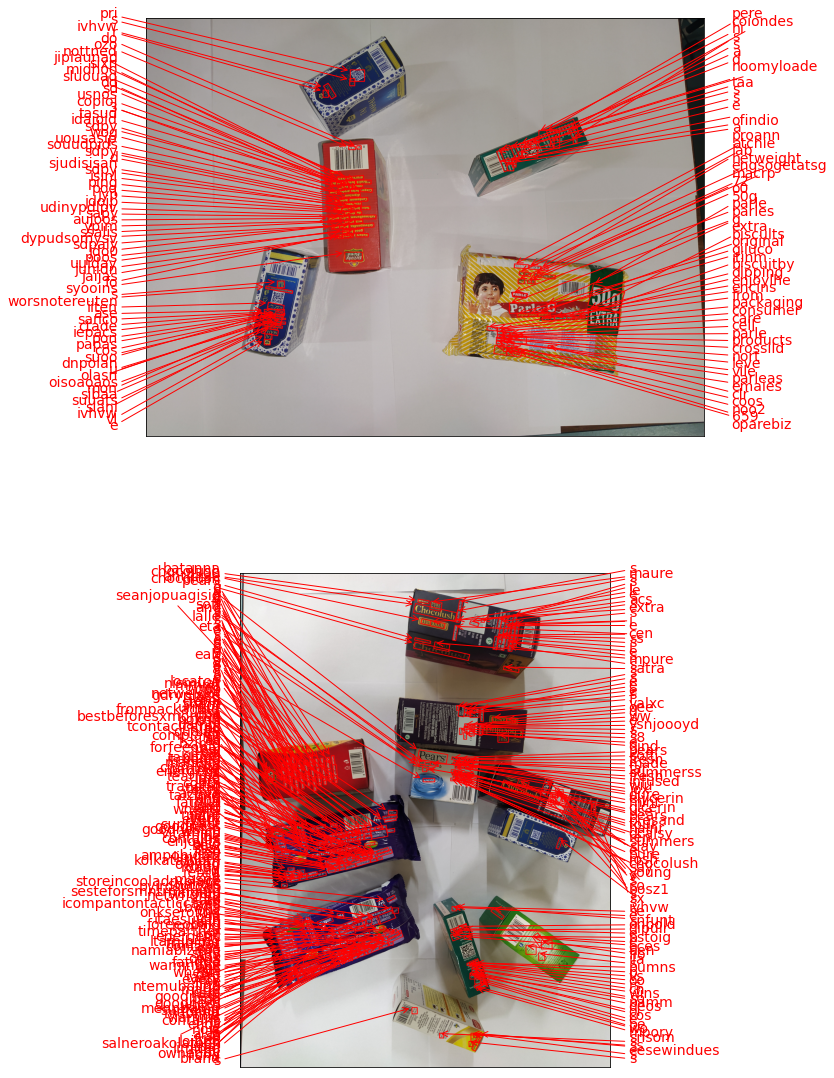

In [10]:
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, 
                                    predictions=predictions, 
                                    ax=ax)    

In [11]:
print(prediction_groups)

[[('pri', array([[1464.8438 ,  378.90625],
       [1566.4062 ,  378.90625],
       [1566.4062 ,  460.9375 ],
       [1464.8438 ,  460.9375 ]], dtype=float32)), ('s', array([[1460.9375 ,  441.40625],
       [1496.0938 ,  441.40625],
       [1496.0938 ,  492.1875 ],
       [1460.9375 ,  492.1875 ]], dtype=float32)), ('ivhvw', array([[1272.9108 ,  494.46985],
       [1305.214  ,  474.2802 ],
       [1363.1495 ,  566.9768 ],
       [1330.8462 ,  587.16644]], dtype=float32)), ('r', array([[1269.5312 ,  523.4375 ],
       [1308.5938 ,  523.4375 ],
       [1308.5938 ,  574.21875],
       [1269.5312 ,  574.21875]], dtype=float32)), ('pere', array([[2869.6833 ,  811.6566 ],
       [3063.0044 ,  732.57056],
       [3113.7166 ,  856.5335 ],
       [2920.3953 ,  935.61957]], dtype=float32)), ('coiondes', array([[3027.7476 ,  801.72424],
       [3054.1487 ,  790.4096 ],
       [3081.6274 ,  854.526  ],
       [3055.2263 ,  865.84064]], dtype=float32)), ('hi', array([[2816.4062 ,  812.5    ],
      

In [12]:
print(len(prediction_groups))

2


In [14]:
print(prediction_groups[0][1])

('s', array([[1460.9375 ,  441.40625],
       [1496.0938 ,  441.40625],
       [1496.0938 ,  492.1875 ],
       [1460.9375 ,  492.1875 ]], dtype=float32))


In [15]:
import cv2

In [16]:
print(prediction_groups[0][2])

('ivhvw', array([[1272.9108 ,  494.46985],
       [1305.214  ,  474.2802 ],
       [1363.1495 ,  566.9768 ],
       [1330.8462 ,  587.16644]], dtype=float32))


In [17]:
print(prediction_groups[0][2][1][0])

[1272.9108   494.46985]


In [19]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np
from google.colab.patches import cv2_imshow

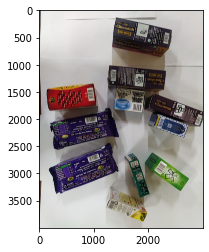

In [20]:
drawn = keras_ocr.tools.drawBoxes(
image=image, boxes=predictions, color = (0,0,0), thickness= 5,boxes_format='predictions')
  #plt.figure(figsize = (20,20))
plt.imshow(drawn)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
j = cv2.cvtColor(drawn, cv2.COLOR_RGB2BGR)
cv2.imwrite("/content/drive/MyDrive/sample/output_IMG_20220303_175317.jpg",j)

True